In [1]:
import re
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

log_files = [
    # Ship:
    # '/data/zlt/RemoteSensePET/outputs/RS/Ship/base_s0/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/RS/Ship/base_s1/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/RS/Ship/base_s2_or1/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/RS/Ship/base_s2_half/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/RS/Ship/base_s2/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/RS/Ship/base_s3/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/RS/Ship/base_s4/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/RS/Ship/base_s5/run_log.txt',
    # Car
    '/data/zlt/RemoteSensePET/outputs/RS/Car/base_s0/run_log.txt',
    '/data/zlt/RemoteSensePET/outputs/RS/Car/base_s1/run_log.txt',
    '/data/zlt/RemoteSensePET/outputs/RS/Car/base_s2/run_log.txt',
    '/data/zlt/RemoteSensePET/outputs/RS/Car/base_s3/run_log.txt',
    '/data/zlt/RemoteSensePET/outputs/RS/Car/base_s4/run_log.txt',
    # People
    '/data/zlt/RemoteSensePET/outputs/RS/People/base_s0/run_log.txt',
    '/data/zlt/RemoteSensePET/outputs/RS/People/base_s1/run_log.txt',
    '/data/zlt/RemoteSensePET/outputs/RS/People/base_s2/run_log.txt',
    '/data/zlt/RemoteSensePET/outputs/RS/People/base_s3/run_log.txt',
    '/data/zlt/RemoteSensePET/outputs/RS/People/base_s4/run_log.txt',
    

    
]



In [ ]:
log_cache = [# SHA:
    # '/data/zlt/RemoteSensePET/outputs/tmp_/SHA_log.txt',
    # '/data/zlt/RSPET/PET/outputs/SHA/pet_model/run_log.txt',
    # # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/vgg_base_epoch15/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/vgg_epoch15/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/vgg_f4x_epoch15/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/vgg_probloss_epoch15/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/vgg_box3layer2_epoch15/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/rsc/Ship/t_noencoder_conquery_f4x/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/rsc/Ship/t_noencoder_conquery_f4x_probloss/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/vgg_base/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/vgg_box3_layer2_epoch15/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/vgg_dim512/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/vgg_conquery/run_log.txt',
    # # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/vgg_split_conquery/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/swin_t/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/swin_t_noencoder/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/swin_t_noencoder_attnsplit/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/swin_t_noencoder_attnsplit_conquery/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/true_cc/SHA/swin_b/run_log.txt',
    # RS:
    ## Ship
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Ship/t/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Ship/t_attn/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Ship/t_noen/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Ship/t_base/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Ship/t_bs16_ctxt64/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Ship/t_bs16_ctxt64_base/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Ship/t_ctxt64/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Ship/t_ctxt64_base/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Ship/t_bs16_ctxt64_base_hfy_zlt/run_log.txt',
    # '/data/zlt/RemoteSensePET/output_nohup/TGRS/Ship/t_bs16_ctxt64_base_zlt/run_log.txt',
    # '/data/zlt/RemoteSensePET/output_nohup/TGRS/Ship/t_bs16_ctxt64_base_hfy_zlt/run_log.txt',
    ## People
    # '/data/zlt/RemoteSensePET/outputs/TGRS/People/t/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/People/t_attn/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/People/t_noen/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/People/t_base/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/People/t_bs16_ctxt64/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/People/t_bs16_ctxt64_base/run_log.txt'
    ## Car
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Car/t/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Car/t_attn/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Car/t_noen/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Car/t_base/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Car/t_bs16_ctxt64/run_log.txt',
    # '/data/zlt/RemoteSensePET/outputs/TGRS/Car/t_bs16_ctxt64_base/run_log.txt',
    ]

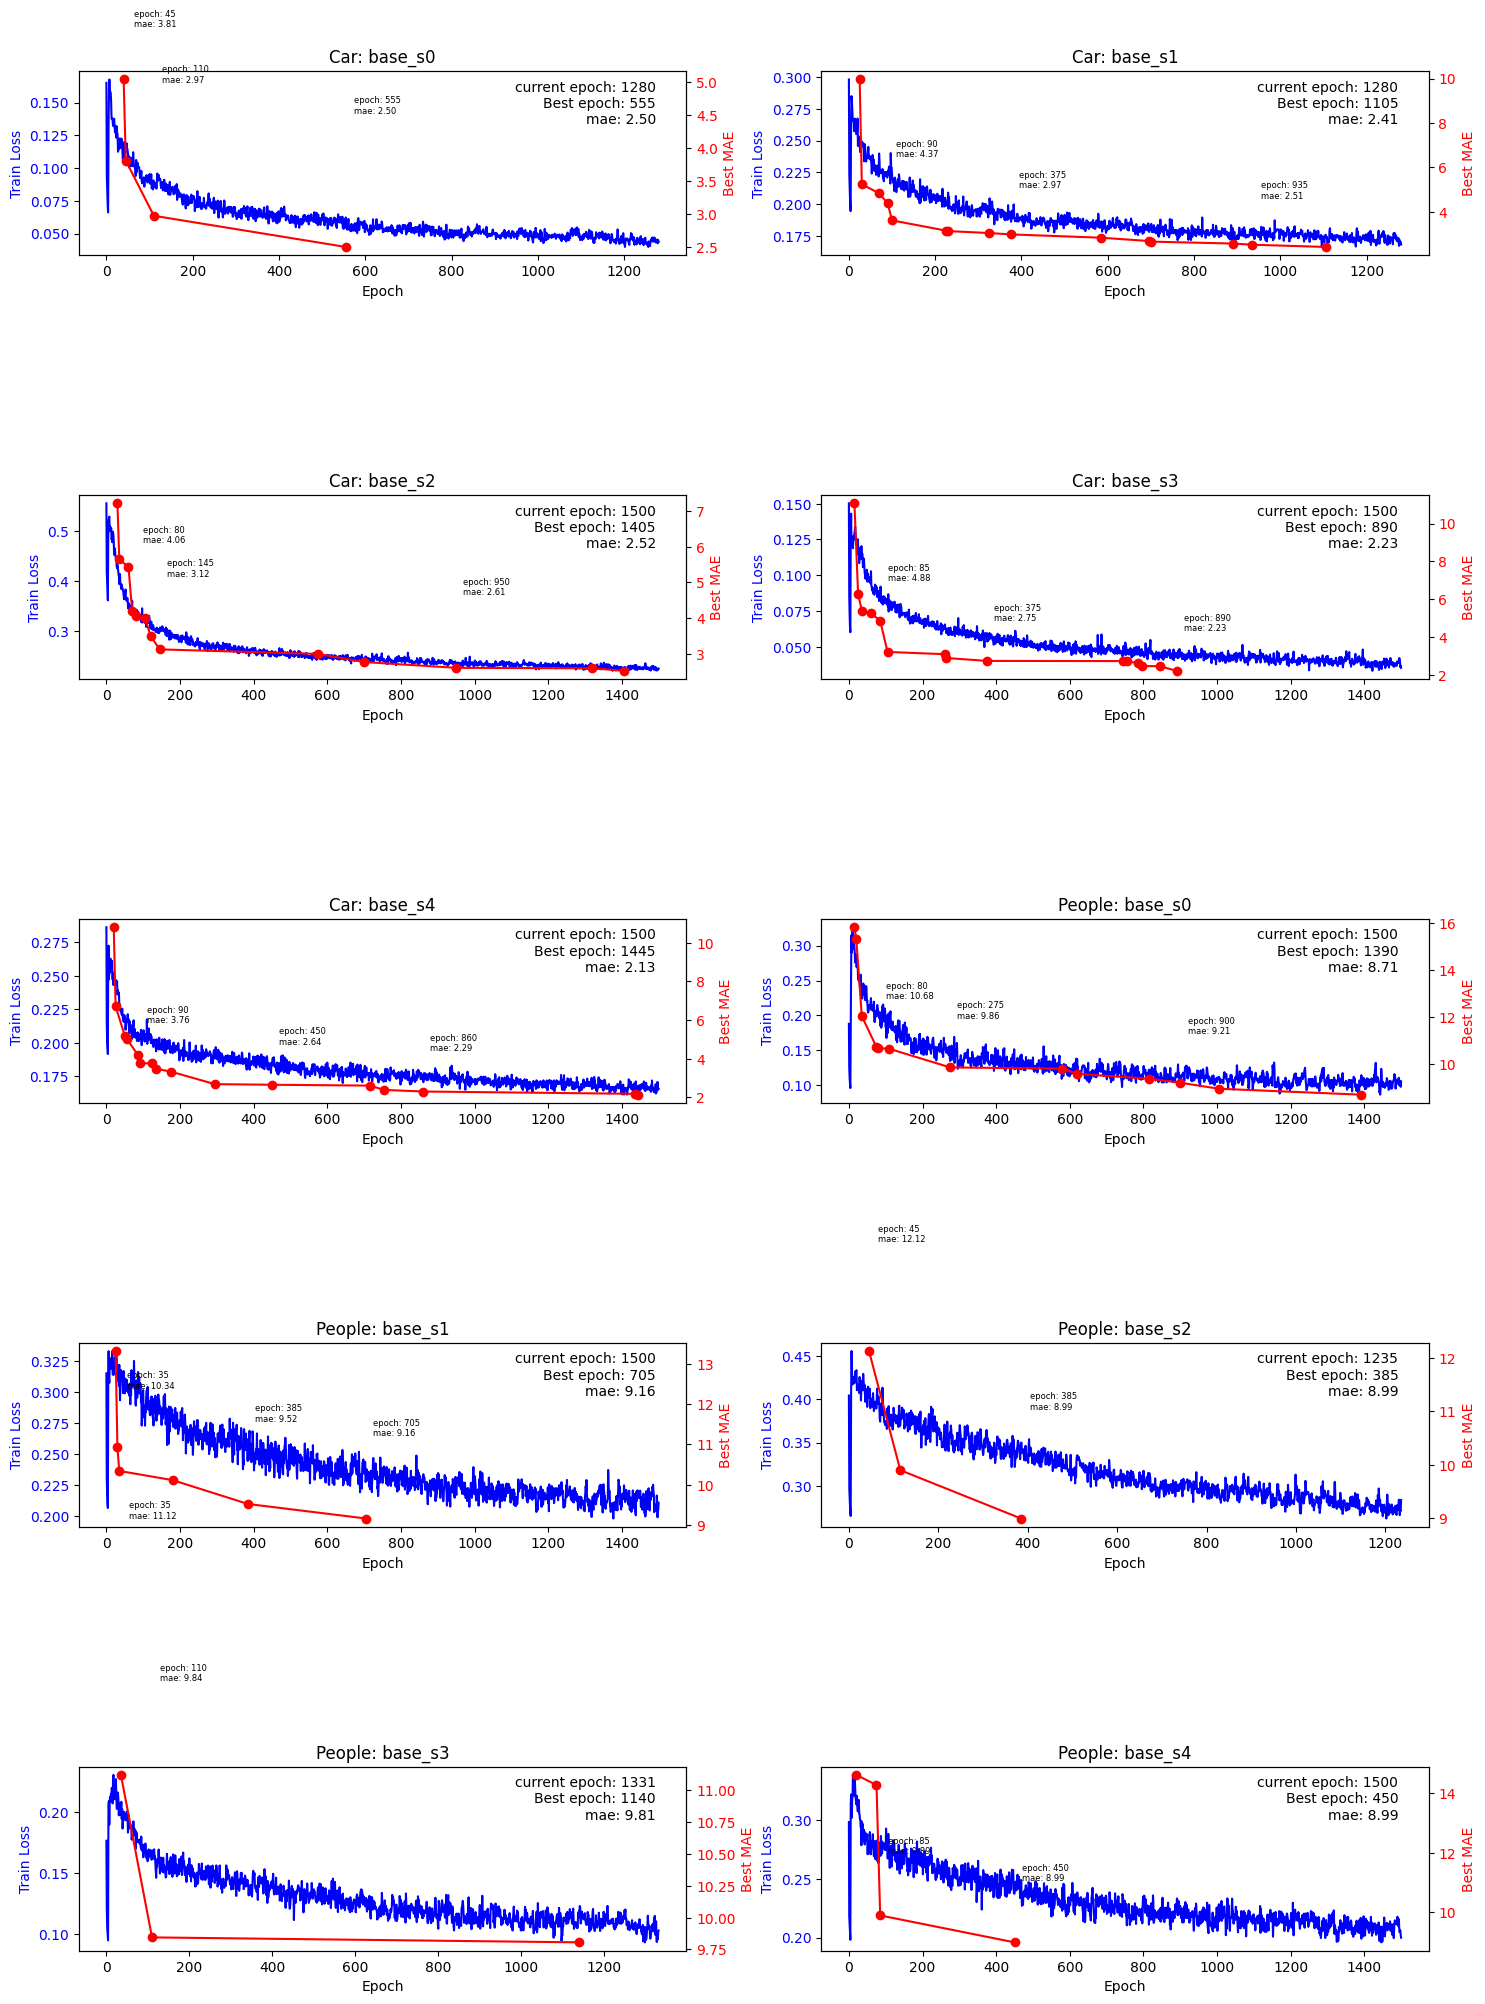

In [2]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
p_x = 0
p_y = 0

for log_file in log_files: #[log_file1, log_file2, log_file3, log_file4]:
    epochs = []
    train_losses = []
    best_maes = []
    best_epochs = []
    with open(log_file, 'r') as f:
        current_best_mae = float('inf')
        for line in f:
            if '[ep' in line:
                json_str = re.search(r'{.*}', line)
                if json_str:
                    data = json.loads(json_str.group())
                    epochs.append(data['epoch'])
                    train_losses.append(data['train_loss'])
            
            elif 'best mae' in line:
                best_info = re.search(r'best mae:(\d+\.\d+), best epoch: (\d+)', line)
                if best_info:
                    mae = float(best_info.group(1))
                    epoch = int(best_info.group(2))
                    if mae < current_best_mae:
                        current_best_mae = mae
                        best_maes.append(mae)
                        best_epochs.append(epoch)

    window = 1
    train_losses_smoothed = pd.Series(train_losses).ewm(span=window, adjust=False).mean().values
    # train_losses_smoothed = train_losses
    
    ax1 = axs[p_y, p_x]  
    if p_x == 0:
        p_x = 1
    else:
        p_x = 0
        p_y += 1
        
    ax1.plot(epochs, train_losses_smoothed, label='Smoothed Train Loss', color='blue')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Train Loss', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(best_epochs[3:], best_maes[3:], label='Best MAE', color='red', marker='o')
    count_print = 0
    
    targets = [100, 500, 1000]
    target_best_epochs = {}

    for t in targets:
        for x in reversed(best_epochs):
            if x < t:
                target_best_epochs[t] = x
                break
    
    for x, y in zip(best_epochs, best_maes):
        if x > 0 and x in target_best_epochs.values():    #count_print % 7 == 0 or x == best_epochs[-1]:
            ax2.text(x + 20, y + 2, f'epoch: {x}\nmae: {y:.2f}', fontsize=6, ha='left', va='bottom')
        count_print += 1

    x_bias = int(best_epochs[-1] * 0.167)
    y_bias = int(train_losses[0] * 30)
    log_name = log_file.split('/')[-3] + ': ' + log_file.split('/')[-2]
    # ax2.text(x -x_bias , y + 16, f'Best epoch: {x}\nmae: {y:.2f}', fontsize=8, ha='left', va='bottom')
    ax2.text( 0.95, 0.95, f'current epoch: {epochs[-1]}\nBest epoch: {x}\nmae: {y:.2f}', transform=ax2.transAxes,  fontsize=10, ha='right',va='top')
    ax2.set_ylabel('Best MAE', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    fig.tight_layout()
    ax1.set_title(f'{log_name}')

fig.savefig('tmps.pdf', bbox_inches='tight')
plt.show()


In [ ]:
log_file_certain = '/data/zlt/RemoteSensePET/outputs/rsc/Ship/t_bs8/run_log.txt'


def read_log_file(log_file_path):
    """读取日志文件并解析为字典列表"""
    with open(log_file_path, 'r') as file:
        lines = file.readlines()

    epochs = []
    lrs = []
    losses = []
    
    for line in lines:
        try:
            json_str = line.strip().split(' ')[-1]
            log_data = json.loads(json_str)

            # 提取需要的数据
            epoch = log_data.get('epoch', None)
            lr = log_data.get('train_lr', None)
            train_loss = log_data.get('train_loss', None)

            # 存储数据
            if epoch is not None and lr is not None and train_loss is not None:
                epochs.append(epoch)
                lrs.append(lr)
                losses.append(train_loss)

        except json.JSONDecodeError:
            continue 

    return epochs, lrs, losses

def plot_data(epochs, lrs, losses):
    """绘制学习率和损失图"""
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Learning Rate', color='tab:blue')
    ax1.plot(epochs, lrs, color='tab:blue', label='Learning Rate', linestyle='--')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Train Loss', color='tab:red')
    ax2.plot(epochs, losses, color='tab:red', label='Train Loss')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title('Learning Rate and Training Loss over Epochs')
    plt.show()
    
epochs, lrs, losses = read_log_file(log_file_certain)
plot_data(epochs, lrs, losses)


AttributeError: 'int' object has no attribute 'get'

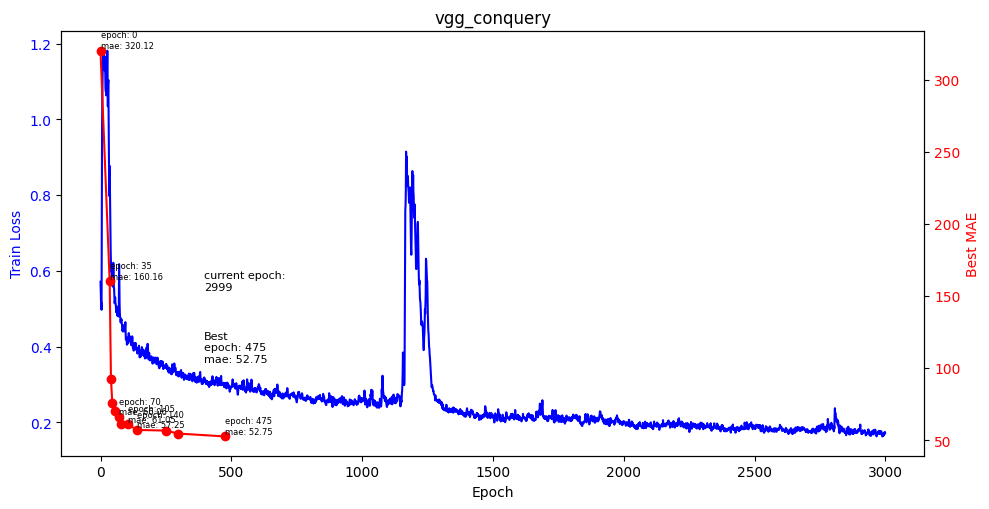

In [ ]:
log_file='/data/zlt/RemoteSensePET/outputs/true_cc/SHA/vgg_conquery/run_log.txt'
fig, axs = plt.subplots(figsize=(10, 5))
epochs = []
train_losses = []
best_maes = []
best_epochs = []
with open(log_file, 'r') as f:
    current_best_mae = float('inf')
    for line in f:
        if '[ep' in line:
            json_str = re.search(r'{.*}', line)
            if json_str:
                data = json.loads(json_str.group())
                epochs.append(data['epoch'])
                train_losses.append(data['train_loss'])
        
        elif 'best mae' in line:
            best_info = re.search(r'best mae:(\d+\.\d+), best epoch: (\d+)', line)
            if best_info:
                mae = float(best_info.group(1))
                epoch = int(best_info.group(2))
                if mae < current_best_mae:
                    current_best_mae = mae
                    best_maes.append(mae)
                    best_epochs.append(epoch)
                    
# best_maes.append(mae)
# best_epochs.append(data['epoch'])
                    
window = 3
train_losses_smoothed = pd.Series(train_losses).ewm(span=window, adjust=False).mean().values
    
ax1 = axs 
    
ax1.plot(epochs, train_losses_smoothed, label='Smoothed Train Loss', color='blue')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
    
# window_size = 50
# for i in range(len(train_losses_smoothed) - window_size):
#     window_losses = train_losses_smoothed[i:i+window_size+1]
#     if check_convergence(window_losses, window_size=window_size, relative_threshold=0.01, std_threshold=0.01):
#         # print('cv')
#         ax1.axvspan(epochs[i], epochs[i+window_size], color='yellow', alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(best_epochs, best_maes, label='Best MAE', color='red', marker='o')
count_print = 0
for x, y in zip(best_epochs, best_maes):
    if x == best_epochs[-1] or x % 7 == 0: # count_print % 3 == 0 or
        ax2.text(x + 0.5, y + 0.4, f'epoch: {x}\nmae: {y:.2f}', fontsize=6, ha='left', va='bottom')
    count_print += 1


x_bias = int(best_epochs[-1] * 0.167)
log_name = log_file.split('/')[-2]
ax2.text(x -x_bias , y + 50, f'Best\nepoch: {x}\nmae: {y:.2f}', fontsize=8, ha='left', va='bottom')
ax2.text(x -x_bias , y + 100, f'current epoch:\n{epochs[-1]}', fontsize=8, ha='left', va='bottom')
ax2.set_ylabel('Best MAE', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
ax1.set_title(f'{log_name}')

# fig.savefig('ex_.pdf', bbox_inches='tight')
plt.show()


In [ ]:
import re
import pandas as pd
import ast
import os

# 原始字符串
text = """
epoch:90, mae:14.343709468223087, mse:21.084322093259146, r2:0.9349233464110835, rmae:23.709414899349213, rmse:32.99281597137451, racc0.8389333100304395, time85.0882077217102

 stats:{'mae': 14.343709468223087, 'mae_ac': 21.517374517374517, 'mse': 21.084322093259146, 'mse_ac': 29.82089392164015, 'Prec': 0.716987279844477, 'pre_ac': 0.7004670785408544, 'Recall': 0.6914155156862208, 'rec_ac': 0.7446109775925855, 'F1_s': 0.6826544434882629, 'f1_ac': 0.7172813677210944, 'abs': 0.23709412972680927, 'abs_ac': 0.139361971820731, 'r2': 0.9349233464110835, 'r2_ac': 0.8577934405257523, 'racc': 0.8389333100304395, 'rac_ac': 0.8808882619475079, 'rmae': 23.709414899349213, 'rmse': 32.99281597137451}

"""

# 解析数据为字典
stats_dict = {}

first_line = text.strip().split('\n')[0]
matches = re.findall(r'(\w+):([\d.]+)', first_line)
for k, v in matches:
    stats_dict[k] = float(v)

matches2 = re.findall(r'(racc)([\d.]+)', first_line)
matches3 = re.findall(r'(time)([\d.]+)', first_line)
for k, v in matches2 + matches3:
    stats_dict[k] = float(v)

stats_line = [line for line in text.strip().split('\n') if 'stats:' in line][0]
stats_str = stats_line.split('stats:')[1].strip()
stats_dict.update(ast.literal_eval(stats_str))

# 新数据行
new_df = pd.DataFrame([stats_dict])

# 写入 Excel（追加模式）
file_path = "tmp.xlsx"
if os.path.exists(file_path):
    existing_df = pd.read_excel(file_path)
    combined_df = pd.concat([existing_df, new_df], ignore_index=True)
else:
    combined_df = new_df

combined_df.to_excel(file_path, index=False)


In [ ]:
num = (400*2*2 + 400*1*2 + 180*3*2) * 4 *2
print(num)

27840
